In [3]:
#K-means algorithm is used for clustering
#Clustering means grouping similar data points together
#K means divide the data into K groups(cluster) where each group contains data points that are more similar to each other than to those in other groups.
#Example- you have a basket of fruits with different sizes and color. k-means can automatically group them into clusters like apple, bananaa, grapes without being told what the fruit is


In [5]:
#How K-means work?
#step 1: choose the number of clusters.if you want to group customer into 3 times then 
#step2 : initialize centroid: randomly place k-points(centroid) in the data points. a centroid is like the center of a cluster
#step 3: assign each data point to the nearest centroid : for each data points we calculate the distance using eucleadean distance to each centroid. it assigns the points to the cluster with the nearest centroid.
# step 4: update3 centroid: when all points are assigned of each cluster by taking the average of all points
#step 5: repeat step 3 and step 4 until conversion, keep reasssigning point and updating centroid. this algorithm is stop when cemtroid stop moving or a maximum number of iteration is reached


In [7]:
import numpy as np
import pandas as pd

In [11]:
df=pd.read_csv("mall.csv")
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
df=df.drop(columns=["CustomerID","Genre"])

In [15]:
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


In [17]:
x=df.iloc[:, [0,1]].values

In [19]:
from sklearn.cluster import KMeans

In [21]:
import matplotlib.pyplot as plt

C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

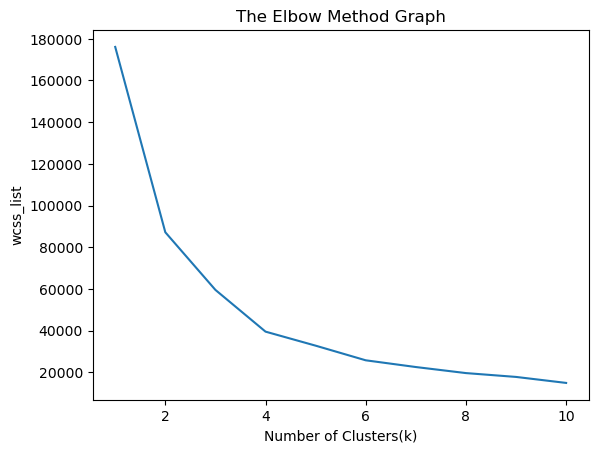

In [23]:
a=[]
for i in range(1,11):
    b=KMeans(n_clusters=i, init="k-means++", random_state=42)
    b.fit(x)
    a.append(b.inertia_)
plt.plot(range(1,11),a)

plt.title("The Elbow Method Graph")
plt.xlabel("Number of Clusters(k)")
plt.ylabel("wcss_list")
plt.show()

In [25]:
b=KMeans(n_clusters=4, init="k-means++",random_state=42)
y_predict=b.fit_predict(x)

C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


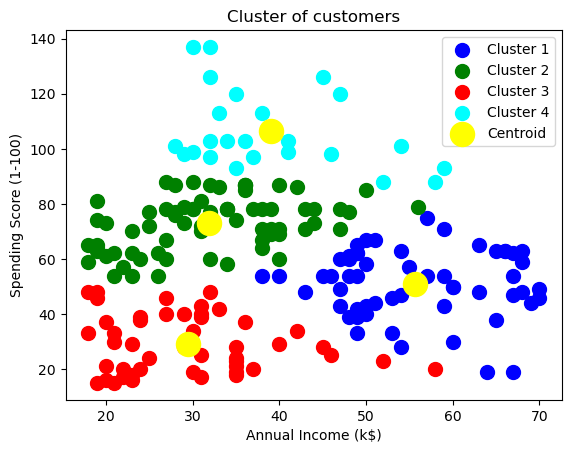

In [29]:
#Visualizing the clusters
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c="blue",label="Cluster 1")
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c="green",label="Cluster 2")
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c="red",label="Cluster 3")
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100,c="cyan",label="Cluster 4")

plt.scatter(b.cluster_centers_[:,0], b.cluster_centers_[:,1],s=300,c="yellow",label="Centroid")

plt.title("Cluster of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()